In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # hiding the warnings 

In [2]:
#reading all the files from directory
path ="G:/Case study/Sales Analysis/Dataset"
files = [file for file in os.listdir(path)]
dataframe = pd.DataFrame()
for file in files:
    current_dataset = pd.read_csv(path + "/"+ file)
    dataframe = pd.concat([dataframe, current_dataset])
dataframe.to_csv('all_month_sales.csv',index = False)

In [3]:
dataset = pd.read_csv('all_month_sales.csv')
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
dataset.info()
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB
(186850, 6)


In [5]:
#check for null values
dataset.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
#Drop null values
dataset =  dataset.dropna(how='all')
dataset.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
 dataset[dataset['Order Date'].str[0:2] == 'Or'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
#excluding the above values from the dataset
dataset =  dataset[dataset['Order Date'].str[0:2] != 'Or']
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
#adding the month column in dataset
dataset['Month'] = pd.to_datetime(dataset["Order Date"]).dt.month
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [11]:
#Converting the columns to right dtype 
dataset['Quantity Ordered'] = pd.to_numeric(dataset['Quantity Ordered'])
dataset['Price Each'] = pd.to_numeric(dataset['Price Each'])

In [12]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null datetime64[ns]
Purchase Address    185950 non-null object
Month               185950 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 11.3+ MB


In [14]:
# Adding the Hour column in dataset
dataset['Hour'] = dataset['Order Date'].dt.hour
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9


In [15]:
#adding the city column 
def get_address(address):
    return  address.split(",")[1].strip(" ")
def get_state(address):
    return address.split(",")[2].split(" ")[1]

dataset['City'] = dataset['Purchase Address'].apply(lambda x : f" {get_address(x)}  ({get_state(x)})")
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,Los Angeles (CA)


## Data Exploration


 #### what  was  the best month of sales? how much was earned  that month

In [16]:
dataset['Sales'] = dataset['Quantity Ordered'] * dataset['Price Each']
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,Boston (MA),99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,Los Angeles (CA),11.99


In [17]:
dataset.groupby('Month').sum()

,Quantity Ordered,Price Each,Hour,Sales
Month,,,,
1,10903,1.811768e+06,139485,1.822257e+06
2,13449,2.188885e+06,172669,2.202022e+06
3,17005,2.791208e+06,218969,2.807100e+06
4,20558,3.367671e+06,262259,3.390670e+06
5,18667,3.135125e+06,238780,3.152607e+06
6,15253,2.562026e+06,195528,2.577802e+06
7,16072,2.632540e+06,206169,2.647776e+06
8,13448,2.230345e+06,172289,2.244468e+06
9,13109,2.084992e+06,168513,2.097560e+06


In [18]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(x=  months,height= dataset.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

<Figure size 640x480 with 1 Axes>

#### which month we sold most items

In [19]:
dataset.groupby('Month').sum().sort_values('Quantity Ordered' ,ascending = False).head(5)['Quantity Ordered']

Month
12    28114
10    22703
4     20558
11    19798
5     18667
Name: Quantity Ordered, dtype: int64

#### what time should we display advertisement to maximize likelihood of customers buying the products?

In [20]:
## adding column count
dataset["Count"] = 1
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,City,Sales,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,Dallas (TX),23.90,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,Boston (MA),99.99,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles (CA),600.00,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles (CA),11.99,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,Los Angeles (CA),11.99,1


In [21]:
dataset.groupby('Hour').count()['Count']

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Count, dtype: int64

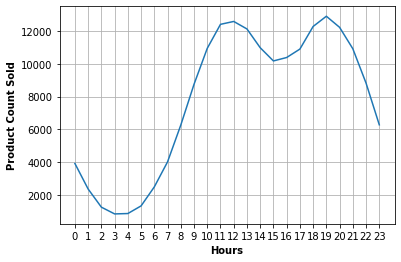

In [22]:
keys =  [pair for pair,df in dataset.groupby(['Hour'])]
plt.plot(keys,dataset.groupby(['Hour']).count()['Count'])
plt.grid()
plt.xticks(keys)
plt.xlabel("Hours", weight = 'bold')
plt.ylabel("Product Count Sold", weight ='bold')
plt.show()
## timing should be in between 

#### What product are sold most often together?


In [23]:
# select rows if id occures several time
df = dataset[dataset['Order ID'].duplicated(keep = False)]
df['Grouped']=df.groupby(['Order ID'])['Product'].transform(lambda X:','.join(X))
df2 = df[['Order ID','Grouped']].drop_duplicates()
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [24]:
# counting  unique pairs of numbers into python dictionay
from itertools import combinations
from collections  import Counter 

count =Counter()
for  row in df2['Grouped']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
for key, values in count.most_common(10):
    print(key, values)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [25]:
# counting  unique pairs  of numbers into python dictionay
from itertools import combinations
from collections  import Counter 

count =Counter()
for  row in df2['Grouped']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 3)))
for key, values in count.most_common(10):
    print(key, values)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


#### what product sold most frequently and why is it so?

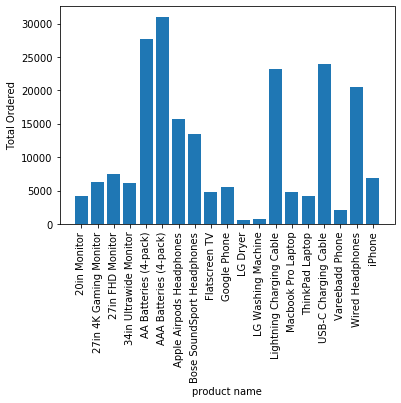

In [26]:
product_name  = dataset.groupby('Product')
total_quantiy_ordered = product_name.sum()['Quantity Ordered']

keys = [pair for pair,df  in product_name ]
plt.xlabel("product name")
plt.ylabel("Total Ordered")
plt.bar(x = keys, height= total_quantiy_ordered)
plt.xticks(keys ,rotation = 'vertical', size =10)
plt.show()


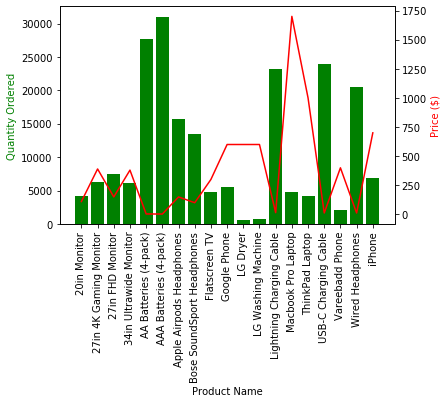

In [27]:
product_price = dataset.groupby('Product')['Price Each'].mean()
fig, axis1 = plt.subplots()
axis2 = axis1.twinx()
axis1.bar(keys, total_quantiy_ordered, color='g')
axis2.plot(keys, product_price, color='r')

axis1.set_xlabel('Product Name')
axis1.set_ylabel('Quantity Ordered', color='g')
axis2.set_ylabel('Price ($)', color='r')
axis1.set_xticklabels(keys, rotation='vertical', size=10)
plt.show()